# 4.1 线性回归

线性回归模型预测  
$$ \hat{y}=\theta{_0}+\theta{_1}x{_1}+\theta{_2}x{_2}+...+\theta{_n}x{_n} $$

线性回归模型预测(向量化形式)  
$$ \hat{y}=h{_\theta}(x)=\theta\cdot x $$

[MSE成本函数](https://blog.csdn.net/yiyexy/article/details/114335981#:~:text=1%E3%80%81%E4%BB%80%E4%B9%88%E6%98%AF%E6%88%90%E6%9C%AC%E5%87%BD%E6%95%B0%202%E3%80%81%E6%88%90%E6%9C%AC%E5%87%BD%E6%95%B0%20Mean%20Square%20Error%20%28MSE%29,Mean%20Absolute%20Error%20%28MAE%29%20MSE%20VS.%20MAE)


## 4.1.1 标准方程

[标准方程](https://img-blog.csdnimg.cn/20200524115150364.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2lvd25sdWNreQ==,size_16,color_FFFFFF,t_70)直接得到使成本函数最小的$ \theta $值

In [2]:
# 测试
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# y = 4 + 3x


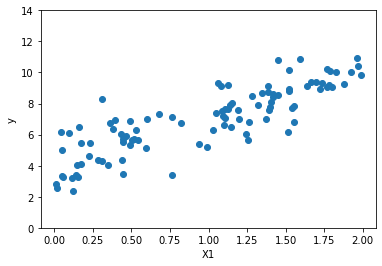

In [16]:
import matplotlib.pyplot as plt

def plt_scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("X1")
    plt.ylabel("y")
    plt.ylim(0, 14)

plt_scatter(X, y)
plt.show()

In [17]:
# 使用inv()函数来对矩阵求逆
X_b = np.c_[np.ones((100, 1)), X]   # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.05087148],
       [3.02291157]])

In [19]:
# 用theta_best预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.05087148],
       [10.09669462]])

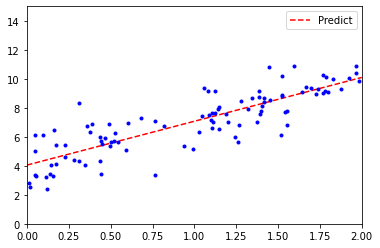

In [25]:
plt.plot(X_new, y_predict, "r--", label="Predict")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()


In [26]:
# 使用sklearn执行线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

# g(x) = w1x1 + w2x2 + w3x3 + w4x4 + w0
# coef_和intercept_都是模型参数，即为w
# coef_为w1到w4
# intercept_为w0

(array([4.05087148]), array([[3.02291157]]))

In [27]:
lin_reg.predict(X_new)

array([[ 4.05087148],
       [10.09669462]])

In [28]:
# LinearRegression类是基于linalg.lstsq()函数, 最小二乘
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # rcond--矩阵可逆的条件数估值
theta_best_svd                                                              # SVD:奇异值分解

array([[4.05087148],
       [3.02291157]])

## 4.1.2 计算复杂度
标准矩阵求逆的复杂度为$O(n{^{2.4}})$到$O(n{^{3}})$之间  
Scikit-Learn的LinearRegression类使用的SVD方法的复杂度约为$O(n{^{2}})$

# 4.2 梯度下降